In [9]:
import pandas
import numpy

import matplotlib.pyplot as plt

from scipy import stats
from typing import Iterable


In [5]:
df = pandas.read_csv("https://course-resources.minerva.edu/uploaded_files/mu/00294342-2873/diabetes.csv")
df = df[df["BMI"] != 0]

array([[<AxesSubplot: title={'center': 'BMI'}>]], dtype=object)

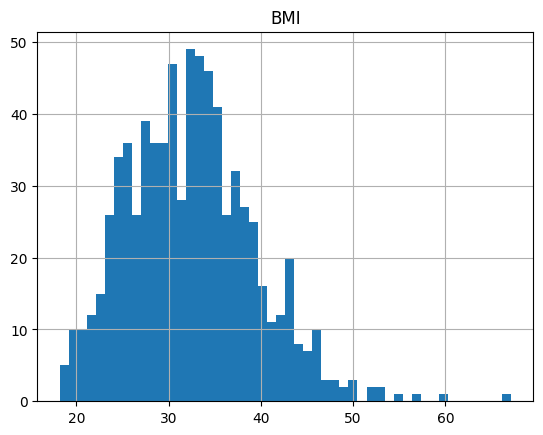

In [6]:
df.hist(column="BMI", bins=50)

In [8]:
control = df[df["BMI"] < 25]
treatment = df[df["BMI"] >= 25]

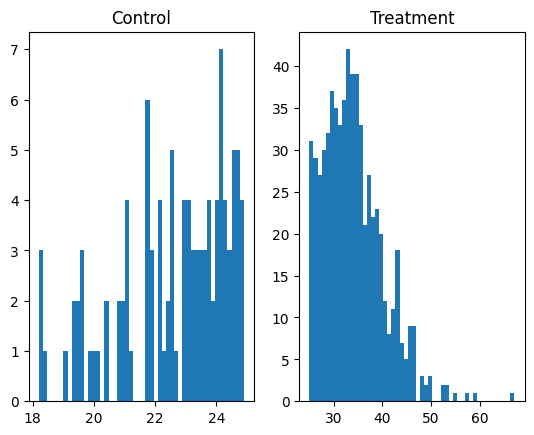

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(control["BMI"], bins=50)
ax1.set_title("Control")

ax2.hist(treatment["BMI"], bins=50)
ax2.set_title("Treatment")

plt.show()

In [ ]:
# H0: mean(control's SkinFoldThickness) = mean(treatment's SkinFoldThickness)
# H1: mean(control's SkinFoldThickness) < mean(treatment's SkinFoldThickness)

In [14]:


def difference_of_means_test(
    control: Iterable[float], treatment: Iterable[float], tails: int = 1
):
    n_1, n_2 = len(control), len(treatment)
    x_1, x_2 = numpy.mean(control), numpy.mean(treatment)

    # sample SD formula (aka Bessel’s correction): use n-1 in denominator
    s_1, s_2 = numpy.std(control, ddof=1), numpy.std(
        treatment, ddof=1
    )  # conservative estimate from OpenIntro

    # conservative estimate from OpenIntro
    DOF = min(n_1, n_2) - 1

    SE = numpy.sqrt(s_1**2 / n_1 + s_2**2 / n_2)
    t_score = numpy.abs((x_2 - x_1)) / SE
    p_value = tails * stats.t.cdf(-t_score, DOF)

    # OpenIntro section 5.3.6
    pooled_SD = numpy.sqrt(
        (s_1**2 * (n_1 - 1) + s_2**2 * (n_2 - 1)) / (n_1 + n_2 - 2)
    )
    cohen_d = (x_2 - x_1) / pooled_SD

    return p_value, cohen_d


In [15]:
# import numpy as np
# from scipy import stats

# def difference_of_means_test(data1,data2,tails):
#     n1 = len(data1)
#     n2 = len(data2)

#     x1 = np.mean(data1)
#     x2 = np.mean(data2)

#     s1 = np.std(data1, ddof = 1)
#     s2 = np.std(data2, ddof = 1)
    
#     SE = np.sqrt(s1**2/n1 + s2**2/n2)
    
#     Tscore = np.abs(((x2-x1))/SE)
#     df = min(n1,n2)-1 
    
#     pvalue = tails*stats.t.cdf(-Tscore, df)
    
#     SDpooled = np.sqrt((s1**2*(n1-1) + ss2**2*(n2-1))/(n1+n2-2))
#     Cohensd = (x2 - x1)/SDpooled
    


#     print('p =',p_value)
#     print('d =',cohens_d)

In [ ]:
# def difference_of_means_test(data1,data2,tails):
#     n1 = len(data1)
#     n2 = len(data2)

#     x1 = np.mean(data1)
#     x2 = np.mean(data2)

#     s1 = np.std(data1,ddof=1) # sample SD formula (aka Bessel’s correction): use n-1 in denominator
#     s2 = np.std(data2,ddof=1)

#     standard_error = np.sqrt(s1**2/n1 + s2**2/n2)
#     t_score = np.abs((x2 - x1))/standard_error
#     df = min(n1,n2) - 1 # conservative estimate from OpenIntro
#     p_value = tails*stats.t.cdf(-t_score,df) # for a 1 or 2-tailed test

#     sd_pooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2))
#     cohens_d = (x2 - x1)/sd_pooled

#     print('p =',p_value)
#     print('d =',cohens_d)